# 第六章 后退式提示 Step-Back Prompting

<div class="toc">
 <ul class="toc-item">
     <li><span><a href="#一、引言" data-toc-modified-id="一、引言">一、引言</a></span></li>
     <li>
         <span><a href="#二、后退式提示的核心要点" data-toc-modified-id="二、后退式提示的核心要点">二、后退式提示的核心要点</a></span>
         <ul class="toc-item">
             <li><span><a href="##2.1 什么是 Step-Back Prompting？" data-toc-modified-id="2.1 什么是 Step-Back Prompting？">2.1 什么是 Step-Back Prompting？</a></span></li> 
             <li><span><a href="##2.2 Step-Back Prompting 技术图解" data-toc-modified-id="2.2 Step-Back Prompting 技术图解">2.2 Step-Back Prompting 技术图解</a></span></li>
             </ul>
         </li>
     <li><span><a href="#三、Step-Back Prompting 应用示例" data-toc-modified-id="三、Step-Back Prompting 应用示例">三、Step-Back Prompting 应用示例</a></span></li>
     <li><span><a href="#四、总结与讨论" data-toc-modified-id="四、总结与讨论">四、总结与讨论</a></span></li>
     </ul>
</div>

## 一、引言
***

当论及抽象的目的时，其旨在创造一个全新的语义层面，从而使人们能够以绝对精确的方式进行表达，而非使事物变得模糊不清。—— Edsger W. Dijkstra

爱因斯坦曾说：“所有困难的问题，答案都在另外一个层次上，同一层次的问题，很难靠同一层次的思考来解决。” 意思就是要解决问题，需要在思维上有所升级，否则问题很难得到解决。 因为答案永远比问题高一个维度。

已有研究表明，利用一种名为 「**后退式提示**」的简单提示技术，使大语言模型（Large Language Models, LLMs）能够进行抽象，从包含特定细节的实例中抽象出**高级概念和关键原理**。使用获得的高级概念和关键原理来指导推理，LLMs 显着提高了它们遵循正确推理路径的能力。这种方法显示出比思维链提示（CoT）提高了高达 36% 的改进。研究者针对 PaLM-2L、GPT-4 和 Llama 2-70B 模型进行了 Step-Back Prompting 实验，在多种具有挑战性的推理密集型任务（包括 STEM 领域、知识问答和多跳推理等）上观察到了显著的性能提升。例如，Step-Back Prompting 在 PaLM-2L 模型上分别将 MMLU 物理和化学任务的性能提高了 7% 和 11%，TimeQA 任务提高了27%，以及 MuSiQue 任务提高了 7%。

**检索增强生成 RAG 与 Step Back Prompting 的不同之处在于**：RAG 先检索相关文档，再结合文档与问题生成答案；而 Step Back Prompting 是先对问题做抽象，使用 LLM 生成出相关背景知识及原理，再结合原问题进行推理。

本章将详细介绍程序后退式提示。我们将深入阐述关键原理，并提供实际的代码示例，以帮助读者全面理解并掌握程序后退式提示的关键原理和实际应用。阅读本章后，读者将能够更专业、准确地理解和应用程序后退式提示。

## 二、后退式提示的核心要点
***

### 2.1 什么是 Step-Back Prompting？

Step-Back Prompting 是一项新兴的提示技术，使得 LLMs 能够进行**抽象**，从中得出高层次概念和基本原理，并运用这些背景知识和原理进行推理和解决问题，从而产生更加准确的答案。Step-Back Prompting 的动机源自以下观察：我们赋予 LLMs 的许多任务充满了隐含和明确的细节。在处理这些类型任务时，LLMs 可能会面临难以检索相关事实的困难。

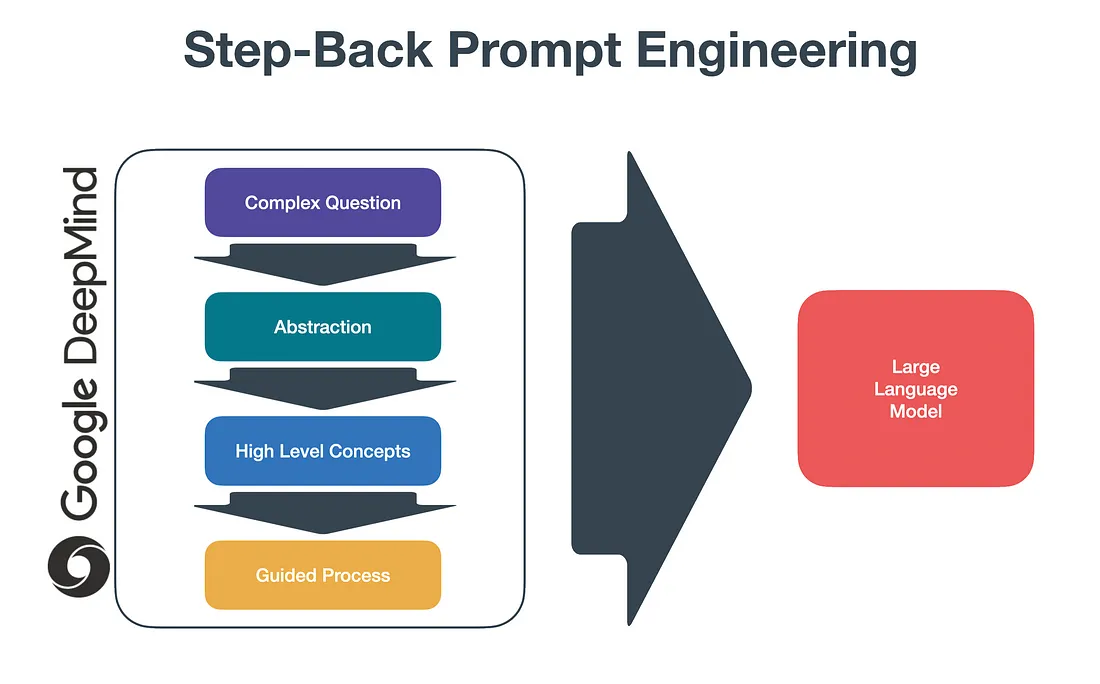

上面的示意图的来源：https://cobusgreyling.medium.com/a-new-prompt-engineering-technique-has-been-introduced-called-step-back-prompting-b00e8954cacb

Step-Back Prompting 的灵感来源于人类在面对具有挑战性任务或问题时停下来反思的倾向。在这种情境下，我们寻求更高层次的概念或原则来指导我们的思维过程。举例而言，当被要求计算三角形的一边长度时，我们可能会首先回想起勾股定理。同样地，若在实际应用中需要解释模型的预测，我们会思考模型无关的可解释方法。


### 2.2 Step-Back Prompting 技术图解

Step-Back Prompting 技术图解，如下图示意：

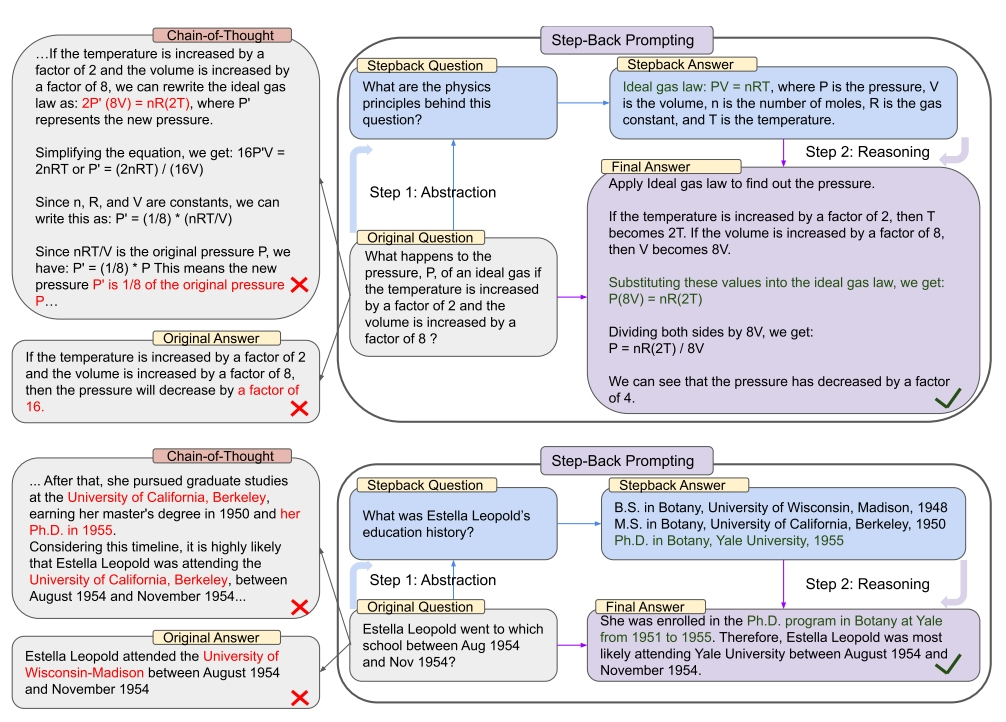

**Step-Back Prompting 的工作原理**

Step-Back Prompting 是指向模型提供额外提示的技术，以便在回答原始问题之前赋予模型一定的抽象思考能力。因此，Step-Back Prompting 可以分为以下两个步骤：
- 抽象：先进行抽象，而不是直接回答问题。我们可以先引导 LLM 提出高层概念和基本原理，仍然与主要问题相关。

- 推理：利用第一个提示和答案作为一个基本机制，LLM 现在可以更准确地推理出解决原始问题的方法。

举两个实际例子，如果主要问题是 “我应该采取哪些具体步骤来减少家庭能源消耗？”，那么退一步的问题可能是 “节能的一般原则是什么？”。或者，不直接深入到 “我该如何修复这行代码中的错误？”，退一步的问题可能是 “这种类型错误的常见原因是什么？”。

小结：**后退式提示是一种优秀的思维策略**，旨在从更宏观、更基础的角度去理解和分析特定问题或情境，从而更有效地回答原始问题。该策略鼓励大语言模型（LLMs）自行抽象问题，获得更高层次的概念和基本原理，并运用这些知识进行推理和解决问题。这种思维模式与人类解决问题的方式非常相似，使得 LLM 能够借鉴已有规律来解决问题。

## 三、Step-Back Prompting 应用示例
***

注意：我使用的测试环境是 Anaconda + Python 3.8.10。Python 的版本要求 Python 3.7+。

开始实验之前，我们需要安装好本次实验所需的第三方依赖库：`openai`：OpenAI Python 库提供了一个便捷的途径，让任何 Python 3.7+ 应用程序可以访问 OpenAI REST API。您可以通过运行以下命令来安装：`pip install openai==1.10.0`。

导入此次实验所需的依赖库

In [1]:
import os
from openai import OpenAI


# 从环境变量中获取 OpenAI API Key 或者直接赋值
OPENAI_API_KEY = os.environ['OPENAI_API_KEY']
OPENAI_API_KEY = "sk-...你的 OpenAI API Key"

# 如果您使用的是官方 API，就直接用 https://api.openai.com/v1 就行。
BASE_URL = "https://api.openai.com/v1"
# 如果您使用的不是官方 API，而是通过代理进行请求，请设置您的代理 URL。
# BASE_URL = "https://api.xxx.../v1"

根据 Step-Back Prompting 的核心思路设计了一个能够实际应用的简洁提示模板（中英文）

In [ ]:
prompt_English = f"""Here is a question or task: ```{Description of the problem/task}```

Let's think things through one step at a time:

Step 1 - Abstract the key concepts and principles relevant to this question:

Step 2 - Use the abstractions to reason through the question:

Final Answer:
"""

prompt_Chinese = f"""这里有一个问题/任务：```{问题/任务描述}```

让我们一步一步地把事情想清楚：

第 1 步 - 抽象出与原始问题相关的关键概念和基本原理：

第 2 步 - 利用这些抽象对问题进行推理：

最终答案：
"""

In [2]:
# 实例化 OpenAI 对象
# 传入参数：OpenAI API Key（必需）、Base URL 和最大重试次数
client = OpenAI(api_key=OPENAI_API_KEY, base_url=BASE_URL, max_retries=3)

In [3]:
# 参数 n，整数或 Null，可选项，默认为 1。为每条输入信息生成多少个聊天完成选项。
# 参数 temperature，实数值或 Null，可选项，默认为 1。使用的采样温度，介于 0 和 2 之间。0.8 等较高值会使输出更加随机，而 0.2 等较低值会使输出更加集中和确定。

def get_completions(system_instruction, llm_prompt, model_endpoint):

    response = client.chat.completions.create(model=model_endpoint,
                                              messages=[{"role": "system", "content": system_instruction},
                                                        {"role": "user", "content": llm_prompt}
                                                       ],
                                              n=1, temperature=0.20, seed=42,
                                              presence_penalty=0, frequency_penalty=0,
                                              max_tokens=1024
                                             )

    return response.choices[0].message.content.strip()

先测试一个开放的问题，要求 LLM 回答 "为什么可解释的人工智能对许多领域都极为重要？"

In [4]:
llm = "gpt-3.5-turbo-0125"

question_Chinese = "为什么可解释的人工智能对许多领域都极为重要？"
print(f"中文问题：{question_Chinese}\n")

system_instruction = "您是机器学习和人工智能领域的专家。"

prompt = f"""这里有一个问题：```{question_Chinese}```

让我们一步一步地把事情想清楚：

第 1 步 - 抽象出与原始问题相关的关键概念和基本原理：

第 2 步 - 利用这些抽象对问题进行推理：

最终答案：
"""

result_Chinese = get_completions(system_instruction, prompt, llm)
print(f"生成结果-中文：\n{result_Chinese}")

中文问题：为什么可解释的人工智能对许多领域都极为重要？

生成结果-中文：
第 1 步 - 抽象出与原始问题相关的关键概念和基本原理：

1. 可解释性：指的是人工智能系统能够解释其决策和推理过程，使人类能够理解其工作原理和结果产生的原因。

2. 可解释的人工智能：是指设计和开发的人工智能系统具有可解释性，能够提供透明、可理解的决策过程和结果解释。

3. 重要性：可解释的人工智能对许多领域都极为重要，因为它能够增强人们对人工智能系统的信任度，提高系统的可接受性和可靠性，同时也有助于发现系统中的潜在问题和偏见。

第 2 步 - 利用这些抽象对问题进行推理：

可解释的人工智能对许多领域都极为重要，主要原因包括：

1. 透明度和可信度：可解释的人工智能系统能够向用户解释其决策和推理过程，使用户能够理解系统的工作原理，增强用户对系统的信任度。

2. 发现问题和偏见：可解释的人工智能有助于揭示系统中的潜在问题和偏见，帮助用户识别和纠正系统中的错误和不公平性，提高系统的公正性和准确性。

3. 法律和伦理要求：在一些领域，如医疗保健和金融服务，对人工智能系统的决策过程和结果需要进行解释和审查，以确保符合法律和伦理要求。

4. 知识转移和教育：可解释的人工智能系统能够向用户传授知识和技能，帮助用户学习和理解复杂的概念和问题，促进知识的传播和共享。

最终答案：

可解释的人工智能对许多领域都极为重要，因为它能够提高人们对人工智能系统的信任度，帮助发现和纠正系统中的问题和偏见，满足法律和伦理要求，促进知识转移和教育。通过设计和开发可解释的人工智能系统，可以更好地应用人工智能技术，推动各领域的发展和进步。


In [5]:
llm = "gpt-3.5-turbo-0125"

question_English = "Why explainable artificial intelligence is extremely important for many fields?"
print(f"英文问题：{question_English}\n")

system_instruction = "You are an expert in the fields of machine learning and artificial intelligence."

prompt = f"""Here is a question: ```{question_English}```

Let’s think things through one step at a time:

Step 1 - Abstract the key concepts and principles relevant to this question:

Step 2 - Use the abstractions to reason through the question:

Final Answer:
"""

result_English = get_completions(system_instruction, prompt, llm)
print(f"生成结果-英文：\n{result_English}")

英文问题：Why explainable artificial intelligence is extremely important for many fields?

生成结果-英文：
Step 1 - Abstract the key concepts and principles relevant to this question:

1. Explainable Artificial Intelligence (XAI): Refers to the ability of AI systems to provide explanations for their decisions and actions in a way that is understandable to humans.
2. Importance: XAI is crucial for many fields such as healthcare, finance, and law where decisions made by AI systems have significant impact on individuals and society.
3. Transparency: XAI enhances transparency, accountability, and trust in AI systems by enabling users to understand the reasoning behind AI-generated outcomes.
4. Ethical and Legal Compliance: XAI helps ensure that AI systems comply with ethical standards, regulations, and laws by enabling stakeholders to assess and verify the fairness, bias, and reliability of AI decisions.

Step 2 - Use the abstractions to reason through the question:

Explainable Artificial Intelligenc

分析认为，英文 Prompt 输入相比中文 Prompt 输入得到的效果更好一些。

第一步抽象出了两个重要概念：

- 可解释人工智能（XAI）：指人工智能系统以人类可理解的方式为其决策和行动提供解释的能力。

- 重要性：XAI 对医疗保健、金融和法律等许多领域都至关重要，因为人工智能系统做出的决定会对个人和社会产生重大影响。

- 透明度：通过让用户了解人工智能生成结果背后的原因，XAI 提高了人工智能系统的透明度、问责制和信任度。

- 道德和法律合规性：XAI 使利益相关者能够评估和验证人工智能决策的公平性、偏见和可靠性，从而帮助确保人工智能系统符合道德标准、法规和法律。

第二步利用生成的知识对问题进行回答，生成的内容合理，且经人工评估，其质量较高。最终的答案准确且简洁。

另外，Step-Back Prompting 是一种技术提示方法，它把原始问题转化为后退式问题，然后利用后退式问题的答案来生成最终答案。

在实际应用中，我们可以创建一个提示模板（基于上下文学习）来引导 LLM 生成后退式问题。以下是具体示意：

In [6]:
llm = "gpt-3.5-turbo-0125"

system_instruction = "你是世界知识的专家。"

# 本质是利用上下文学习（In-Context Learning）  提供一些演示
prompt = f"""你的任务是后退一步，将一个问题转述为一个更通用的后退式问题，这样更容易回答。
这里有几个例子：
原始问题：周志华老师在 1996 年 9 月至 1999 年 6 月期间就读于哪所学校？
后退式问题：周志华老师的教育经历是什么？
原始问题：如果温度增加 2 倍，体积增加 8 倍，理想气体的压强 P 会发生什么变化？
后退式问题：这个问题背后的物理原理是什么？
原始问题：Rede Globo 的主播会说中文吗？
后退式问题：Rede Globo 的主播讲什么语言？
原始问题：如何利用大语言模型成功发表高质量 SCI 论文？
后退式问题：
"""

result_Chinese = get_completions(system_instruction, prompt, llm)
print(f"生成结果-中文：\n{result_Chinese}")

生成结果-中文：
如何有效利用大语言模型进行学术研究？


In [7]:
llm = "gpt-3.5-turbo-0125"

system_instruction = "You are an expert at world knowledge."

# 本质是利用上下文学习（In-Context Learning）  提供一些演示
prompt = f"""Your task is to step back and paraphrase a question to a more generic step-back question, \
which is easier to answer. 
Here are a few examples:
Original Question: Zhi-Hua Zhou went to which school between September 1996 and June 1999?
Stepback Question: What was the education history of Zhi-Hua Zhou?
Original Question: What happens to the pressure, P, of an ideal gas if the temperature is increased by a factor of 2 and the volume is increased by a factor of 8?
Stepback Question: What are the physics principles behind this question?
Original Question: Do the anchors on Rede Globo speak Chinese?
Stepback Question: What languages do the anchors on Rede Globo speak?
Original Question: How to use the large language model to successfully publish high quality SCI papers?
Stepback Question: 
"""

result_English = get_completions(system_instruction, prompt, llm)
print(f"生成结果-英文：\n{result_English}")

生成结果-英文：
What are the key steps to effectively utilize the large language model for publishing high-quality SCI papers?


最后一个实验展示了使用原始问题、后退式问题、原则以及由 gpt-3.5-turbo-0125 生成的最终答案的提示的完整示例。

问题解析：

钾-40 是钾的一种放射性同位素，它含有 19 个质子和 21 个中子（因为它的原子量是 40，原子序数是 19，原子量等于质子数加上中子数，即 40 = 19 + 21）。在钾-40不发生衰变的情况下，它的电子数与质子数相等，也就是 19 个电子，以保持电中性。

当钾-40 作为硫酸钾（K2SO4）的一部分时，它的原子核（包含质子和中子）不会因为化学键的形成而改变。因此，钾-40 在硫酸钾中仍然有 19 个质子和 21 个中子。然而，由于钾原子在形成硫酸钾时会失去一个电子，成为钾离子（K+），所以每个钾离子将只有 18 个电子。

所以，答案应为 (A) 21 个中子、19 个质子、18 个电子

In [10]:
llm = "gpt-3.5-turbo-0125"

system_instruction = "你是世界知识的专家。"

prompt = f"""原问题：“钾-40 是天然钾中的一种次要同位素。它具有放射性，可以在简单的辐射计数器上检测到。
当钾-40 是 K2SO4 的一部分时，它有多少个质子、中子和电子？
请从下面的列表中选择一个选项：
(A) 21 个中子、19 个质子、18 个电子
(B) 20 个中子、19 个质子、19 个电子
(C) 21 个中子、19 个质子、19 个电子
(D) 19 个中子、19 个质子、19 个电子”

后退式问题：“这个问题背后的化学原理是什么？”
原理：“1. 原子序数：元素的原子序数是该元素原子核中质子的数目。\n2. 原子得失电子形成离子。”
最终答案：
"""

result_Chinese = get_completions(system_instruction, prompt, llm)
print(f"生成结果-中文：\n{result_Chinese}")

生成结果-中文：
这个问题背后的化学原理是原子结构和同位素的概念。在这种情况下，钾-40是钾的同位素，它的原子核包含了19个质子和21个中子。由于原子是电中性的，因此钾-40原子也应该有19个电子。因此，正确答案是(A) 21个中子、19个质子、19个电子。


In [11]:
llm = "gpt-3.5-turbo-0125"

system_instruction = "You are an expert at world knowledge."

prompt = f"""Original Question: "Potassium-40 is a minor isotope found in naturally occurring potassium. It is radioactive and can be detected on simple radiation counters.
How many protons, neutrons, and electrons does potassium-40 have when it is part of K2SO4?
Choose an option from the list below:
(A) 21 neutrons, 19 protons, 18 electrons
(B) 20 neutrons, 19 protons, 19 electrons
(C) 21 neutrons, 19 protons, 19 electrons
(D) 19 neutrons, 19 protons, 19 electrons"

Stepback Question: "What are the chemistry principles behind this question?"
Principles: "1. Atomic number: The atomic number of an element is the number of protons in the nucleus of an atom of that element. \n 2. Atoms gain and lose electrons to form ions."
Final Answer:
"""

result_English = get_completions(system_instruction, prompt, llm)
print(f"生成结果-英文：\n{result_English}")

生成结果-英文：
The atomic number of an element determines the number of protons in its nucleus. In the case of potassium-40 (K), it has an atomic number of 19, which means it has 19 protons. 

In a neutral atom, the number of protons is equal to the number of electrons. Since potassium-40 is part of K2SO4, it forms an ion with a +1 charge. This means it loses one electron, so it will have 18 electrons.

To find the number of neutrons, you subtract the number of protons from the atomic mass. The atomic mass of potassium-40 is approximately 40. Therefore, the number of neutrons is 40 - 19 = 21.

So, the correct option is (A) 21 neutrons, 19 protons, 18 electrons.


当以英文 Prompt 输入时，gpt-3.5-turbo-0125 给出了正确的推理过程和答案。当以中文 Prompt 输入时，它给出了错误的答案：“由于原子是电中性的，因此 钾-40 原子也应该有 19 个电子。因此，正确答案是 (A) 21 个中子、19 个质子、19 个电子。”

原因在于没有理解 K 原子要失去一个电子变成 K 离子。

## 四、总结与讨论
***

通过引入 Step-Back Prompting 激发抽象，我们可以提高大语言模型的推理能力。研究者们正在研究如何通过抽象来提高大语言模型处理复杂问题的能力。这项研究再次强调了大语言模型的多功能性，并探索了如何创新与大语言模型的交互方式，以充分利用它们。这种技术还展示了静态提示的广泛应用，并明确指出，随着问题复杂性的增加，我们需要更多的增强工具，如提示链和自主智能体。

Step-Back Prompting 的创新性和简单性鼓励我们更广泛地考虑像人类一样的抽象，以充分发挥 LLMs 的潜力。Step-Back Prompting 的研究论文强调了大语言模型对抽象的处理能力，并指出推理是预测性能的主要限制。Step-Back Prompting 表明，尽管大语言模型可能相对容易掌握抽象，但在推理阶段的导航仍具挑战性。

未来的改进方向是提高 LLMs 的推理能力。这个概念也符合哲学前提，即抽象不仅是一个模糊的概念，而且是形成高阶理解时精确性的基础。

要点总结：
- 大语言模型（LLMs）在各种任务中表现出色，但在复杂推理方面面临困难，Step-Back Prompting 旨在解决这一问题。

- **Step-Back Prompting 通过采用抽象来增强推理能力**，模仿人类认知策略来分解推理过程。在工程实现中，Step-Back Prompting 可以与 RAG 结合，通过利用后退提示生成的抽象问题，获取更多与最终答案相关的上下文信息。随后，将获得的上下文信息与原始问题一并传递给 LLM，以提升其回答质量。

- 该技术显著改善了在需要深层知识和多步推理的挑战性任务上的表现，超越了其他方法。实验表明 LLMs 能很好地进行抽象，但推理仍然是一个挑战，Step-Back Prompting 有效地帮助这个过程。未来的改进应该集中在完善 LLMs 的推理能力，并将类人抽象作为理解的重要基础。


📚 主要参考资料：
- ICLR 2024 - Step-Back Prompting Enables Reasoning Via Abstraction in Large Language Models，https://openreview.net/forum?id=3bq3jsvcQ1

- 知乎 - 退一步，看得更远：通过抽象引发大型语言模型中的推理，https://zhuanlan.zhihu.com/p/663680218

- Lilian Weng - LLM Powered Autonomous Agents，https://lilianweng.github.io/posts/2023-06-23-agent/
